# This regression analysis addresses the question: How does normalized rainfall intensity per year vary with elevation, and can elevation help predict hydroclimatic pressure across urban catchments?

# 1. Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Import Urban Flood Risk data
path = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk"
file_path = os.path.join(path, '02 Data', 'Prepared Data', 'urban_pluvial_flood_risk_clean2.csv')
df = pd.read_csv(file_path)

### Note: This dataset contains the newly created "rainfall_intensity_per_year" column created in Exercise 6.3, which will be used in this exercise.

In [4]:
df.columns

Index(['segment_id', 'city_name', 'admin_ward', 'latitude', 'longitude',
       'catchment_id', 'elevation_m', 'dem_source', 'land_use', 'soil_group',
       'drainage_density_km_per_km2', 'storm_drain_proximity_m',
       'storm_drain_type', 'rainfall_source',
       'historical_rainfall_intensity_mm_hr', 'return_period_years',
       'risk_labels', 'rainfall_intensity_per_year'],
      dtype='object')

# 2. Exploratory Visualization

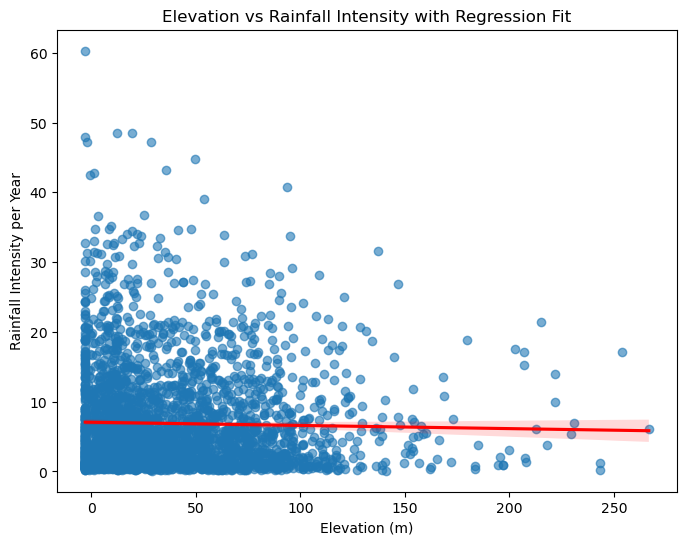

In [17]:
# Rainfall Intensity Per Year vs Elevation
plt.figure(figsize=(8,6))
sns.regplot(
    x='elevation_m', 
    y='rainfall_intensity_per_year', 
    data=df, 
    scatter_kws={'alpha':0.6}, 
    line_kws={'color':'red'}
)
plt.title('Elevation vs Rainfall Intensity with Regression Fit')
plt.xlabel('Elevation (m)')
plt.ylabel('Rainfall Intensity per Year')
plt.show()

### Observation: since the correlation line shows a weak negative relationship, I will continue to look at other variables.

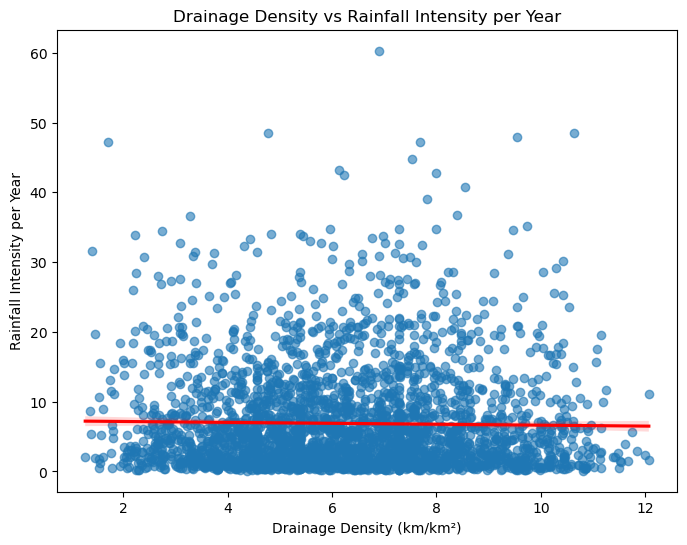

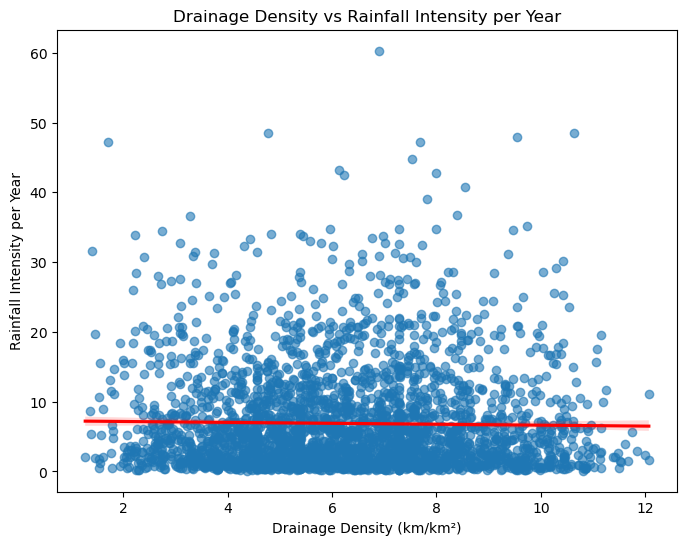

In [14]:
# Drainage Density vs Rainfall Intensity
plt.figure(figsize=(8,6))
sns.regplot(
    x='drainage_density_km_per_km2',
    y='rainfall_intensity_per_year',
    data=df,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Drainage Density vs Rainfall Intensity per Year')
plt.xlabel('Drainage Density (km/km²)')
plt.ylabel('Rainfall Intensity per Year')
plt.show()

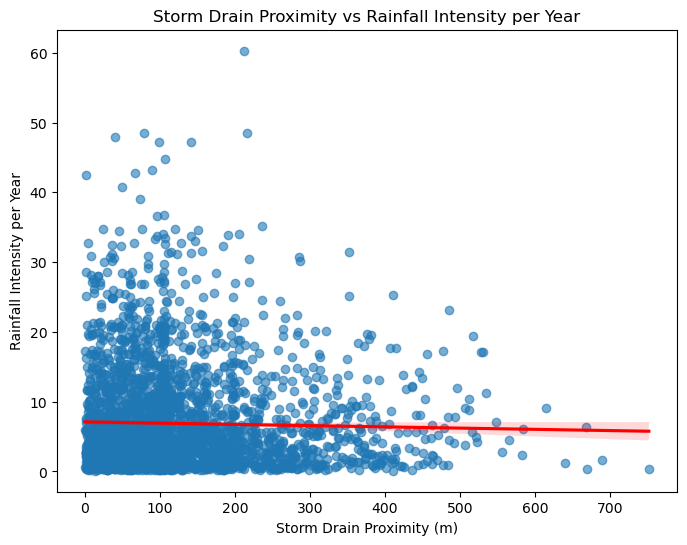

In [15]:
# Storm Drain Proximity vs Rainfall Intensity
plt.figure(figsize=(8,6))
sns.regplot(
    x='storm_drain_proximity_m',
    y='rainfall_intensity_per_year',
    data=df,
    scatter_kws={'alpha':0.6},
    line_kws={'color':'red'}
)
plt.title('Storm Drain Proximity vs Rainfall Intensity per Year')
plt.xlabel('Storm Drain Proximity (m)')
plt.ylabel('Rainfall Intensity per Year')
plt.show()

### Final observation: 
- Rainfall Intensity Per Year & Drainage Density shows no systematic relationship.
- Rainfall Intensity Per Year & Storm Drain Proximity has a slightly negative relationship, but this analysis may be better suited for a design analysis.
- Rainfall Intensity Per Year & Elevation, despite the negative relationship, remains the best choice for regression modeling. This pair represents a physically meaningful factor that can influence hydroclimateic behavior and allows us to see how elevation contributes, if at all, rainfall intensity across urban catchments. 

# 3. Regression

In [20]:
# Define x (independent) and y (dependent)
x = df[['elevation_m']]
y = df['rainfall_intensity_per_year']

In [21]:
# Split the data into training (80%) and testing (20%)
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [22]:
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [23]:
# Predict y values on the test set
y_pred = model.predict(x_test)

In [24]:
print(model.coef_, model.intercept_)
print(y_pred[:5])

[-0.0026641] 7.063864262438779
[6.81530405 6.87652499 7.04790632 7.0478264  6.75248466]


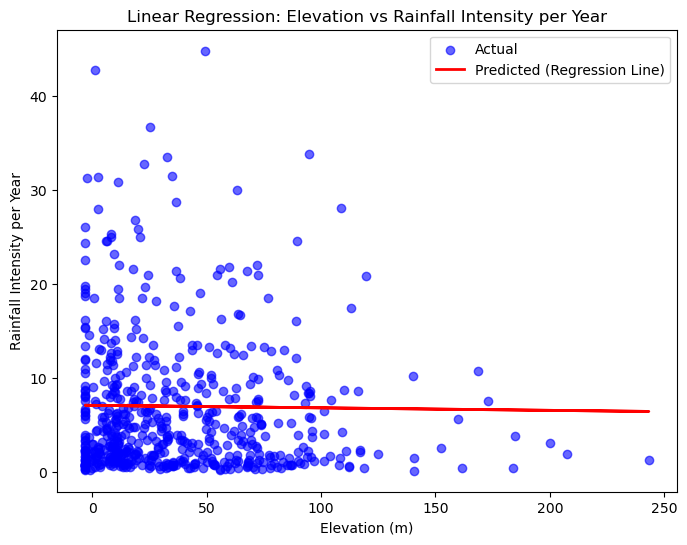

In [34]:
#  Visualization of Test Set with Regression Line
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted (Regression Line)')
plt.title('Linear Regression: Elevation vs Rainfall Intensity per Year')
plt.xlabel('Elevation (m)')
plt.ylabel('Rainfall Intensity per Year')
plt.legend()

# Save graph
save_dir = "/Users/charlottelin/Documents/Achievement 6 Urban Flood Risk/04 Analysis/Visualizations"
os.makedirs(save_dir, exist_ok=True)
save_path = os.path.join(save_dir, "elevation_vs_rainfall_regression_testset.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')

plt.show()

### Observation: 
- The linear regression analysis explored whether elevation could predict normalized rainfall intensity per year across urban catchments. - The resulting regression line exhibited a weak negative slope, with a coefficient of approximately −0.0027, indicating that rainfall intensity decreases marginally as elevation increases.
- The intercept of 7.06 suggests that, at sea level, predicted rainfall intensity is roughly 7 normalized units per year.
- However, the slope’s magnitude is minimal, and visually, the regression line appears almost flat across the data distribution.
- The scatterplot shows a large vertical spread of points at nearly every elevation, signaling high variability and the absence of a strong linear trend.

In [31]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 50.8868
R-squared (R²): -0.0018


### Observation:
- The negative R² value indicates that the model performs slightly worse than simply using the mean rainfall intensity as a predictor. In other words, elevation explains virtually none of the variation in rainfall intensity. 
- The large MSE reflects the substantial spread of actual values around the regression line.

In [33]:
# Compare predicted & actual values
comparison = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
comparison.head(20)

,Actual,Predicted
1750,9.150,6.815304
1583,0.534,6.876525
2741,24.500,7.047906
736,16.000,7.047826
2688,2.340,6.752485
781,3.710,6.807711
1937,0.488,6.884038
807,44.800,6.932231
1736,5.820,7.051796
332,4.340,7.051103


### Observation:
- The predicted rainfall intensities remain clustered between 6.8 and 7.1, while actual values range widely from <1 to >40.
- This narrow spread of predictions indicates that the model captures almost none of the real variability in the data.
- The regression behaves like a mean predictor, suggesting that elevation provides negligible explanatory power for rainfall intensity. This reinforces the conclusion that rainfall patterns are influenced by broader climatic and infrastructural factors rather than local elevation differences.

## Final Reflection

### Several factors may contribute to the weak correlation:

- Spatial imbalance: Certain cities or regions may dominate the dataset, limiting representativeness across different climatic zones.
- Resolution mismatch: Differences in elevation data sources (SRTM vs. Copernicus) and rainfall datasets (ERA5, IMD) could introduce measurement inconsistencies.
- Normalization effects: The variable rainfall_intensity_per_year aggregates temporal variability, which may obscure localized extreme events.

Future analyses should test multivariate or non-linear models incorporating drainage density, storm drain proximity, and land-use interactions to capture compound drivers of hydroclimatic pressure.

### Analytical implication

While statistically insignificant, this result may still be analytically meaningful. It demonstrates that rainfall intensity in urban catchments is <b>NOT</b> linearly dependent on elevation, which shows the complex, multi-scalar nature of flood risk modeling. The analysis provides a valuable baseline for future research focused on the interplay between physical geography, infrastructure, and climate dynamics in shaping urban hydroclimatic vulnerability.

### Conclusion for the research question

#### <i>How does normalized rainfall intensity per year vary with elevation, and can elevation help predict hydroclimatic pressure across urban catchments?<i>
The analysis concludes that elevation alone cannot predict hydroclimatic pressure across urban catchments. Although rainfall intensity shows a minimal decrease with elevation, the effect is statistically insignificant. The weak relationship highlights that hydroclimatic risk in cities is driven by the interaction of meteorological dynamics, infrastructure design, and surface characteristics, not by elevation in isolation. Future studies should expand the model to integrate multiple variables to better capture the spatial complexity of urban flood risk.